# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [3]:
# What the dataset looks like?
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
# What are the data types?
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [6]:
# Which columns contain the features of the websites?
X = websites.drop(columns=['Type'])

In [7]:
X.columns # variables predictoras

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES'],
      dtype='object')

In [8]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
y = websites['Type'] # target
y.value_counts() # codificación binaria. Benign -> 0, Malicious -> 1

Type
0    1565
1     216
Name: count, dtype: int64

In [9]:
# 0 for bening 1 for maliciuos websites

In [10]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
X

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,89,132181,6945,87,4.0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0,0.0


In [11]:
# Para hacernos una idea de los datos que hay, de los valores nulos, y de los valores que toma cada columna, hacemos value_counts y unique, así como len(unique()) para todos los casos
for col in X.columns:
    print(f"{col}\n")
    print(f"'{col}' value_counts: {X[col].value_counts()}")
    print(f"'{col}' unique: {X[col].unique()}")
    print(f"'{col}' len(unique): {len(X[col].unique())}\n")

URL

'URL' value_counts: URL
B0_676     1
M0_109     1
B0_2314    1
B0_911     1
B0_113     1
          ..
M3_75      1
M2_17      1
B0_1128    1
B0_462     1
B0_2064    1
Name: count, Length: 1781, dtype: int64
'URL' unique: ['M0_109' 'B0_2314' 'B0_911' ... 'B0_162' 'B0_1152' 'B0_676']
'URL' len(unique): 1781

URL_LENGTH

'URL_LENGTH' value_counts: URL_LENGTH
39     86
40     48
46     44
42     43
38     43
       ..
183     1
198     1
201     1
234     1
249     1
Name: count, Length: 142, dtype: int64
'URL_LENGTH' unique: [ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 120 122 123 124 125
 126 128 129 131 132 134 135 

In [12]:
websites['CHARSET'] = websites['CHARSET'].str.lower().str.strip()

## NLP

In [13]:
# CHARSET
X['CHARSET_'] = X['CHARSET'].str.lower().str.strip()
X['CHARSET_'].unique()
X.drop(columns=['CHARSET'], inplace=True)

In [14]:
# One-hot encode categorical variables
charset_onehot = pd.get_dummies(X['CHARSET_'], drop_first=False).astype(int)
X_encoded = pd.concat([X.drop(columns='CHARSET_'), charset_onehot], axis=1)
X_encoded


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,...,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,iso-8859,iso-8859-1,us-ascii,utf-8,windows-1251,windows-1252
0,M0_109,16,7,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,...,1153,832,9,2.0,0,1,0,0,0,0
1,B0_2314,16,6,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,...,1265,1230,17,0.0,0,0,0,1,0,0
2,B0_911,16,6,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,...,0,0,0,0.0,0,0,1,0,0,0
3,B0_113,17,6,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,...,18784,4380,39,8.0,0,1,0,0,0,0
4,B0_403,17,6,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,...,129889,4586,61,4.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,...,186,0,0,0.0,0,0,0,1,0,0
1777,M4_41,198,17,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,...,124,0,0,0.0,0,0,0,1,0,0
1778,B0_162,201,34,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,...,132181,6945,87,4.0,0,0,0,1,0,0
1779,B0_1152,234,34,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,...,0,0,0,0.0,0,1,0,0,0,0


In [15]:
X

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,CHARSET_
0,M0_109,16,7,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,iso-8859-1
1,B0_2314,16,6,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,utf-8
2,B0_911,16,6,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,us-ascii
3,B0_113,17,6,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,iso-8859-1
4,B0_403,17,6,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,utf-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,utf-8
1777,M4_41,198,17,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0,utf-8
1778,B0_162,201,34,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,89,132181,6945,87,4.0,utf-8
1779,B0_1152,234,34,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0,0.0,iso-8859-1


#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

In [16]:
cols_num = websites.select_dtypes(include='number').columns.tolist()
cols_num

['URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'CONTENT_LENGTH',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'SOURCE_APP_PACKETS',
 'REMOTE_APP_PACKETS',
 'SOURCE_APP_BYTES',
 'REMOTE_APP_BYTES',
 'APP_PACKETS',
 'DNS_QUERY_TIMES',
 'Type']

In [17]:
websites_num = websites[cols_num]

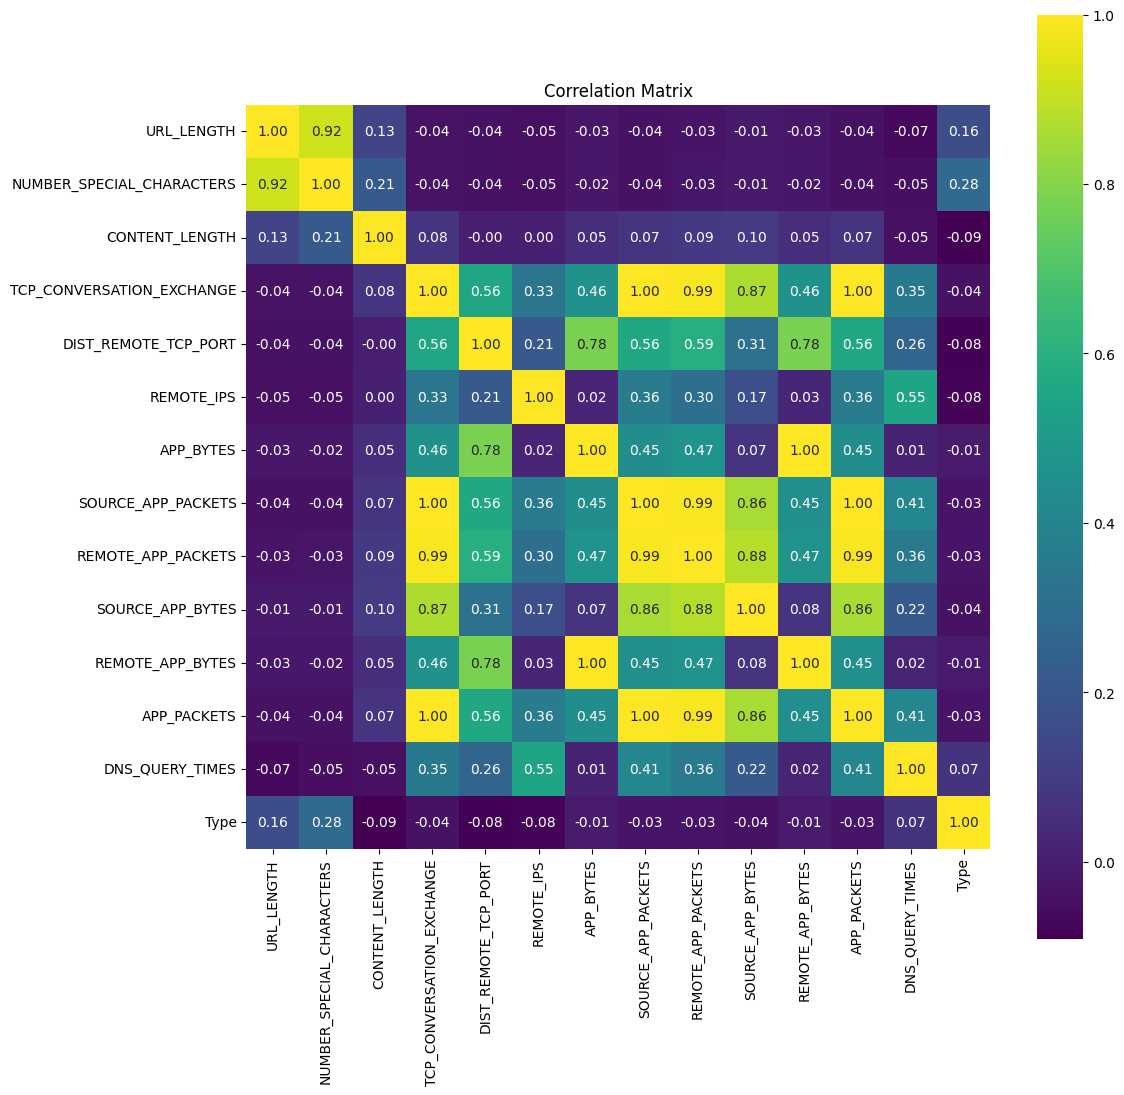

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = websites_num.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [19]:
# pip install xgboost

In [20]:
random_state = 42

In [21]:
X = websites.select_dtypes(include='number').drop('Type', axis=1)
y = websites.Type

In [22]:
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=random_state)
xgb.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [23]:
sort_idx = xgb.feature_importances_.argsort()

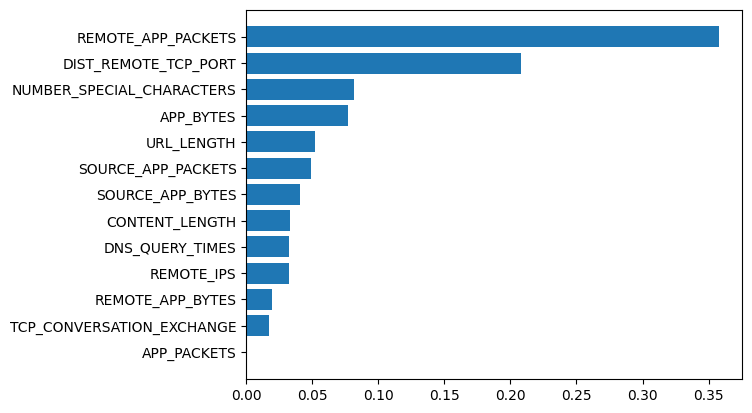

In [24]:
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.show()

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

In [25]:
websites_num

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,NaN,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,NaN,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,8904.0,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,NaN,0,0,0,0,0,0,0,0,0,0.0,0


In [26]:
websites_num[(websites_num['SOURCE_APP_PACKETS'] - websites_num['APP_PACKETS']) == 0] # Es la misma info

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,NaN,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,NaN,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,8904.0,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,NaN,0,0,0,0,0,0,0,0,0,0.0,0


In [27]:
# Eliminamos las correlaciones altas de 0.99 o 1 de la matriz de correlación
websites_num.drop(columns=["URL_LENGTH", "SOURCE_APP_PACKETS", "REMOTE_APP_BYTES", "APP_PACKETS", "REMOTE_APP_PACKETS"], inplace=True)

C:\Users\emartin4\AppData\Local\Temp\ipykernel_25972\925654039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  websites_num.drop(columns=["URL_LENGTH", "SOURCE_APP_PACKETS", "REMOTE_APP_BYTES", "APP_PACKETS", "REMOTE_APP_PACKETS"], inplace=True)


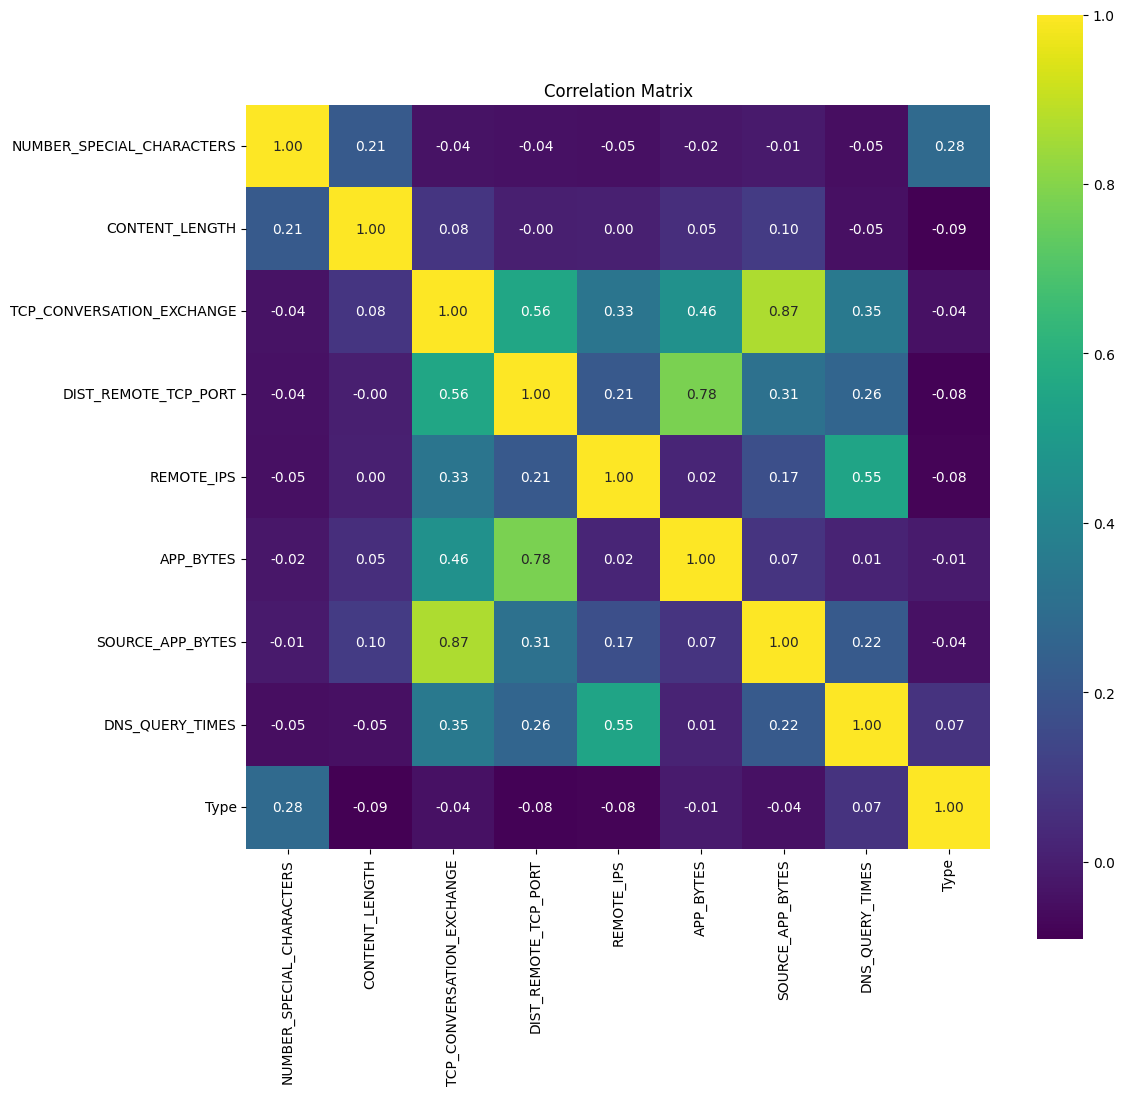

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = websites_num.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

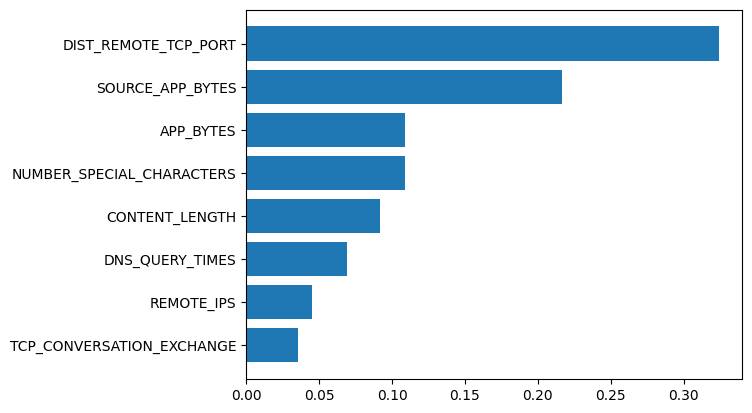

In [29]:
import xgboost as xgb
X = websites_num.drop('Type', axis=1)
y = websites_num.Type

xgb = xgb.XGBClassifier(random_state=random_state)
xgb.fit(X,y)

sort_idx = xgb.feature_importances_.argsort()

plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.show()

# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [30]:
# Now we will drop the rows with missing data
drop_cols = ["URL_LENGTH", "SOURCE_APP_PACKETS", "REMOTE_APP_BYTES", "APP_PACKETS", "REMOTE_APP_PACKETS"]
websites.drop(columns=drop_cols, inplace=True)
100*(websites.isnull().sum() / len(websites))

URL                           0.000000
NUMBER_SPECIAL_CHARACTERS     0.000000
CHARSET                       0.393038
SERVER                        9.882089
CONTENT_LENGTH               45.592364
WHOIS_COUNTRY                17.181359
WHOIS_STATEPRO               20.325660
WHOIS_REGDATE                 7.130825
WHOIS_UPDATED_DATE            7.804604
TCP_CONVERSATION_EXCHANGE     0.000000
DIST_REMOTE_TCP_PORT          0.000000
REMOTE_IPS                    0.000000
APP_BYTES                     0.000000
SOURCE_APP_BYTES              0.000000
DNS_QUERY_TIMES               0.056148
Type                          0.000000
dtype: float64

In [31]:
# Firts we will drop the columns with more than 50% of missing data
# Drop 'CONTENT_LENGTH' 
websites_num.drop(columns=['CONTENT_LENGTH'], inplace=True)

C:\Users\emartin4\AppData\Local\Temp\ipykernel_25972\4083490775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  websites_num.drop(columns=['CONTENT_LENGTH'], inplace=True)


In [32]:
drop_cols = ["SOURCE_APP_PACKETS", "REMOTE_APP_BYTES", "APP_PACKETS", "REMOTE_APP_PACKETS", "CONTENT_LENGTH"]

In [33]:
# Now we will drop the rows with missing data
websites.drop(columns="CONTENT_LENGTH", inplace=True)
websites.isnull().sum() / len(websites)

URL                          0.000000
NUMBER_SPECIAL_CHARACTERS    0.000000
CHARSET                      0.003930
SERVER                       0.098821
WHOIS_COUNTRY                0.171814
WHOIS_STATEPRO               0.203257
WHOIS_REGDATE                0.071308
WHOIS_UPDATED_DATE           0.078046
TCP_CONVERSATION_EXCHANGE    0.000000
DIST_REMOTE_TCP_PORT         0.000000
REMOTE_IPS                   0.000000
APP_BYTES                    0.000000
SOURCE_APP_BYTES             0.000000
DNS_QUERY_TIMES              0.000561
Type                         0.000000
dtype: float64

#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [34]:
websites.dropna(inplace=True)

In [35]:
websites

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
3,B0_113,6,iso-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,18784,8.0,0
5,B0_2064,7,utf-8,nginx,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,11,6,9,894,838,0.0,0
6,B0_462,6,iso-8859-1,Apache/2,US,CO,29/07/2002 0:00,1/07/2016 0:00,12,0,3,1189,8559,2.0,0
7,B0_1128,6,us-ascii,Microsoft-HTTPAPI/2.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,0,0,0,0,0,0.0,0
10,B0_1013,6,utf-8,Apache,US,Kansas,14/09/2007 0:00,9/09/2015 0:00,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,16,utf-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,186,0.0,1
1777,M4_41,17,utf-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,124,0.0,1
1778,B0_162,34,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,132181,4.0,0
1779,B0_1152,34,iso-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0.0,0


# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [36]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                957
CA                 75
ES                 63
AU                 26
PA                 21
GB                 13
JP                 10
IN                  8
CZ                  8
CN                  8
NL                  5
[u'GB'; u'UK']      5
CH                  5
UK                  4
AT                  4
ru                  4
BS                  4
SC                  3
PH                  3
us                  3
KY                  3
RU                  2
SI                  2
UA                  2
KG                  2
UY                  2
HK                  2
UG                  1
LV                  1
TR                  1
PK                  1
IL                  1
SE                  1
DE                  1
IT                  1
NO                  1
BY                  1
BE                  1
IE                  1
AE                  1
Name: count, dtype: int64

In [37]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x : good_country[x])

In [38]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'UK', 'NL', 'UG', 'JP',
       'CN', 'SI', 'KY', 'AT', 'CZ', 'PH', 'LV', 'TR', 'ES', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IL', 'DE', 'SE', 'IT', 'NO', 'BE', 'BY', 'AE',
       'IE', 'UY', 'KG'], dtype=object)

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [39]:
# Your code here
def print_bar_plot(x,y):
    plt.figure(figsize=(14,5))
    plt.bar(x, y)
    return plt.show()

def print_barh_plot(x,y):
    plt.figure(figsize=(14,5))
    plt.barh(x, y)
    return plt.show()

In [40]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'UK', 'NL', 'UG', 'JP',
       'CN', 'SI', 'KY', 'AT', 'CZ', 'PH', 'LV', 'TR', 'ES', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IL', 'DE', 'SE', 'IT', 'NO', 'BE', 'BY', 'AE',
       'IE', 'UY', 'KG'], dtype=object)

In [41]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     26
UK     22
PA     21
JP     10
IN      8
CZ      8
CN      8
RU      6
NL      5
CH      5
BS      4
AT      4
SC      3
PH      3
KY      3
SI      2
UA      2
KG      2
UY      2
HK      2
UG      1
TR      1
LV      1
PK      1
IL      1
SE      1
DE      1
IT      1
NO      1
BY      1
BE      1
IE      1
AE      1
Name: count, dtype: int64

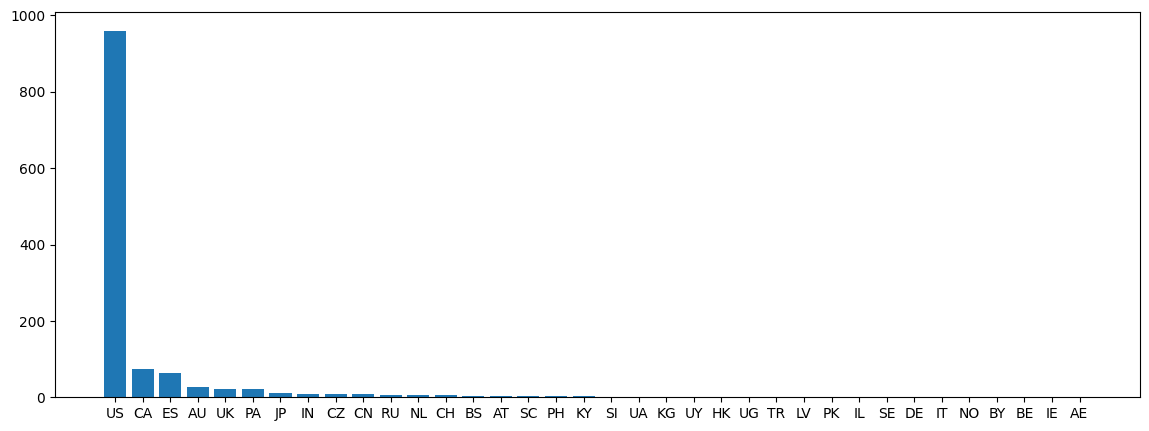

In [42]:
print_bar_plot(websites.WHOIS_COUNTRY.value_counts().index,websites.WHOIS_COUNTRY.value_counts())

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [43]:
top_countries10 = websites['WHOIS_COUNTRY'].value_counts().head(10).index

In [44]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_countries10 else 'OTHER')
websites['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
US       960
CA        75
ES        63
OTHER     56
AU        26
UK        22
PA        21
JP        10
IN         8
CN         8
CZ         8
Name: count, dtype: int64

In [45]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US       960
CA        75
ES        63
OTHER     56
AU        26
UK        22
PA        21
JP        10
IN         8
CN         8
CZ         8
Name: count, dtype: int64

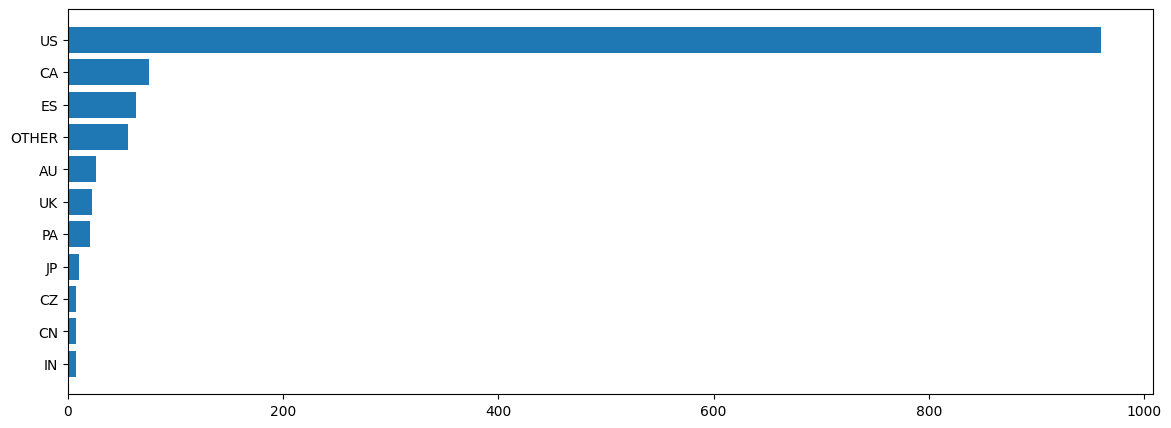

In [46]:
print_barh_plot(websites.WHOIS_COUNTRY.value_counts(ascending=True).index,websites.WHOIS_COUNTRY.value_counts(ascending=True))

Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [47]:
websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [48]:
websites.dtypes

URL                           object
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [49]:
websites.drop(columns='URL', inplace=True)

#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [50]:
websites['CHARSET'].value_counts()

CHARSET
utf-8           799
iso-8859-1      358
us-ascii         98
windows-1251      1
windows-1252      1
Name: count, dtype: int64

`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [51]:
websites['SERVER'].value_counts()

SERVER
Apache                                                           311
nginx                                                            144
cloudflare-nginx                                                  80
Microsoft-HTTPAPI/2.0                                             76
GSE                                                               49
                                                                ... 
My Arse                                                            1
IdeaWebServer/v0.80                                                1
Apache/2.4.17 (Unix) OpenSSL/1.0.1e-fips PHP/5.6.19                1
Microsoft-IIS/7.5; litigation_essentials.lexisnexis.com  9999      1
Apache/2.2.16 (Debian)                                             1
Name: count, Length: 193, dtype: int64

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [52]:
types = ['Microsoft', 'Apache', 'nginx']
websites['SERVER'] = websites['SERVER'].apply(lambda x: next((t for t in types if t in x), 'Other'))
websites['SERVER'].value_counts()

SERVER
Apache       491
nginx        322
Other        300
Microsoft    144
Name: count, dtype: int64

OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [53]:
website_dummy = pd.get_dummies(websites, drop_first=True).astype(int)
website_dummy

,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,CHARSET_us-ascii,CHARSET_utf-8,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
3,6,31,22,3,3812,18784,8,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,7,11,6,9,894,838,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,6,12,0,3,1189,8559,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,6,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,16,0,0,0,0,186,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1777,17,0,0,0,0,124,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1778,34,83,2,6,6631,132181,4,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1779,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


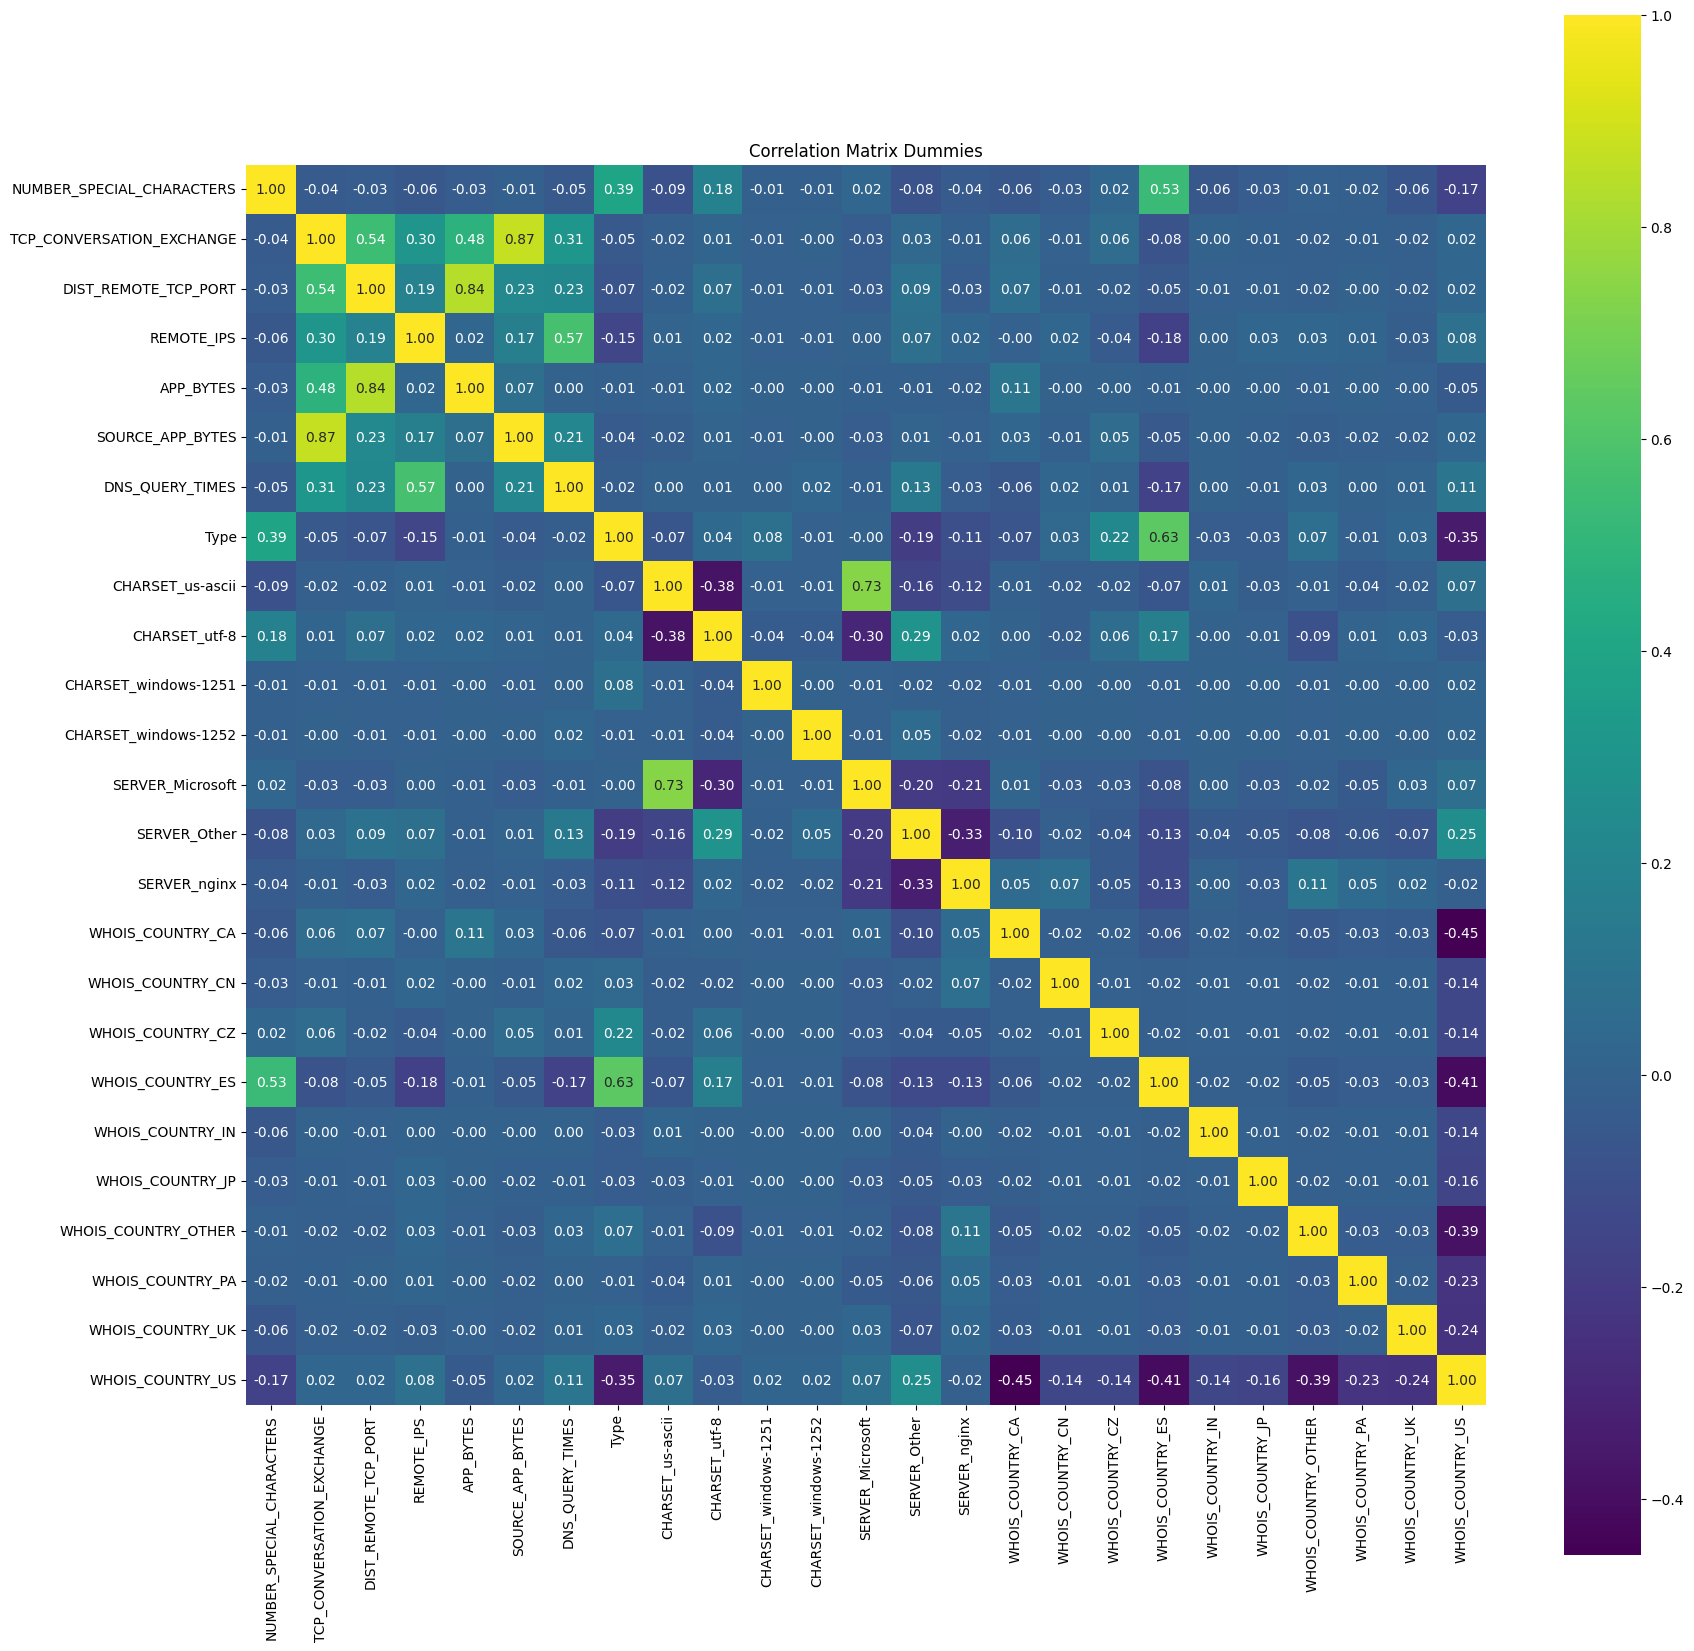

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = website_dummy.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix Dummies')
plt.show()

Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [55]:
website_dummy.dtypes

NUMBER_SPECIAL_CHARACTERS    int64
TCP_CONVERSATION_EXCHANGE    int64
DIST_REMOTE_TCP_PORT         int64
REMOTE_IPS                   int64
APP_BYTES                    int64
SOURCE_APP_BYTES             int64
DNS_QUERY_TIMES              int64
Type                         int64
CHARSET_us-ascii             int64
CHARSET_utf-8                int64
CHARSET_windows-1251         int64
CHARSET_windows-1252         int64
SERVER_Microsoft             int64
SERVER_Other                 int64
SERVER_nginx                 int64
WHOIS_COUNTRY_CA             int64
WHOIS_COUNTRY_CN             int64
WHOIS_COUNTRY_CZ             int64
WHOIS_COUNTRY_ES             int64
WHOIS_COUNTRY_IN             int64
WHOIS_COUNTRY_JP             int64
WHOIS_COUNTRY_OTHER          int64
WHOIS_COUNTRY_PA             int64
WHOIS_COUNTRY_UK             int64
WHOIS_COUNTRY_US             int64
dtype: object

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [56]:
from sklearn.model_selection import train_test_split

X = website_dummy.drop('Type', axis=1)
y = website_dummy['Type']
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1257, 24) (1005, 24) (252, 24)
(1257,) (1005,) (252,)


#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [57]:
from sklearn.linear_model import LogisticRegression

# Fitting a multiple linear model
lr = LogisticRegression() # Create the LogisticRegression estimator

A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [58]:
# Perform the fitting
lr.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lr.intercept_, lr.coef_)

[-0.06892587] [[-5.24460982e-02 -6.84421318e-02 -2.18539027e-01 -1.37897792e-01
   8.39093331e-05  2.45109182e-05  1.29315435e-02 -1.22658418e-02
  -3.20684637e-02  6.25615122e-04 -1.01955551e-04 -1.04487782e-02
  -3.59098027e-02 -3.67142574e-02 -9.78061314e-03  5.37426087e-04
   6.49368285e-03  3.95337321e-02 -8.81516415e-04 -1.88665593e-03
  -8.00939326e-04 -1.25160800e-03 -5.54983130e-04 -9.59203958e-02]]


c:\Users\emartin4\Videos\MIDA\venv-mida\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make prediction
# y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva
y_test_pred = (y_test_prob >= 0.5).astype(int)  # Predicción binaria

# y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)[:, 1]  # Probabilidad para la clase positiva
y_train_pred = (y_train_prob >= 0.5).astype(int)  # Predicción binaria

# Calcular matriz de confusión y precisión
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print("Matriz de confusión:")
print(conf_matrix)
print("Precisión:", accuracy)

Matriz de confusión:
[[224   0]
 [ 28   0]]
Precisión: 0.8888888888888888


In [60]:
website_dummy['Type'].value_counts(normalize=True) # Está muy desbalanceado, por eso predice todo 0

Type
0    0.887033
1    0.112967
Name: proportion, dtype: float64

Classification accuracy: 0.8888888888888888


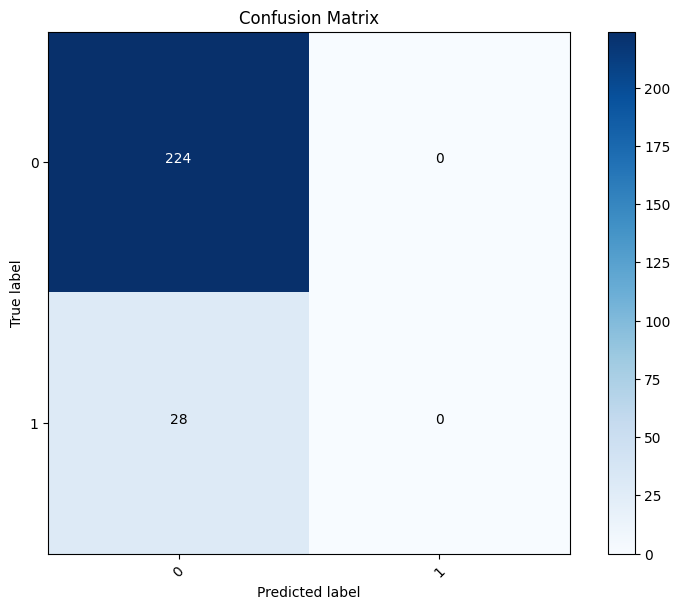

In [61]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

def plot_confusion_matrix(y, y_pred):
    # Generate the confusion matrix
    cm = metrics.confusion_matrix(y, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    # Adding tick marks and labels for clarity
    classes = np.unique(y)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Adding text annotations to each cell in the confusion matrix
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assume y and y_pred are defined elsewhere in your code
print("Classification accuracy:", metrics.accuracy_score(y_test, y_test_pred))
plot_confusion_matrix(y_test, y_test_pred)
plt.show()

¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [62]:
from sklearn import tree  # For decision tree models

dt = tree.DecisionTreeClassifier(random_state=42,max_depth=3)
dt.fit(X_train,y_train.ravel())

C:\Users\emartin4\AppData\Local\Temp\ipykernel_25972\3625839874.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  dt.fit(X_train,y_train.ravel())


DecisionTreeClassifier(max_depth=3, random_state=42)

Matriz de confusión del Árbol de Decisión:
[[223   1]
 [ 18  10]]
Precisión del Árbol de Decisión: 0.9246031746031746


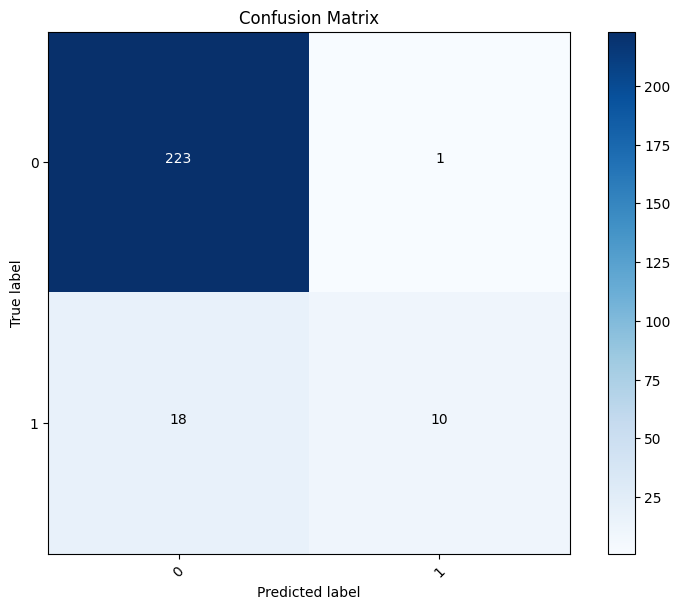

In [63]:
# Predecir utilizando el modelo entrenado
y_pred_dt = dt.predict(X_test)

# Calcular la matriz de confusión y la precisión
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Matriz de confusión del Árbol de Decisión:")
print(conf_matrix_dt)
print("Precisión del Árbol de Decisión:", accuracy_dt)

# print("Classification accuracy:", metrics.accuracy_score(y_test, y_pred_dt))
plot_confusion_matrix(y_test, y_pred_dt)
plt.show()

#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [64]:
from sklearn import tree  # For decision tree models

dt = tree.DecisionTreeClassifier(random_state=42,max_depth=5)
dt.fit(X_train,y_train.ravel())

C:\Users\emartin4\AppData\Local\Temp\ipykernel_25972\3118197768.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  dt.fit(X_train,y_train.ravel())


DecisionTreeClassifier(max_depth=5, random_state=42)

Matriz de confusión del Árbol de Decisión:
[[223   1]
 [ 18  10]]
Precisión del Árbol de Decisión: 0.9246031746031746


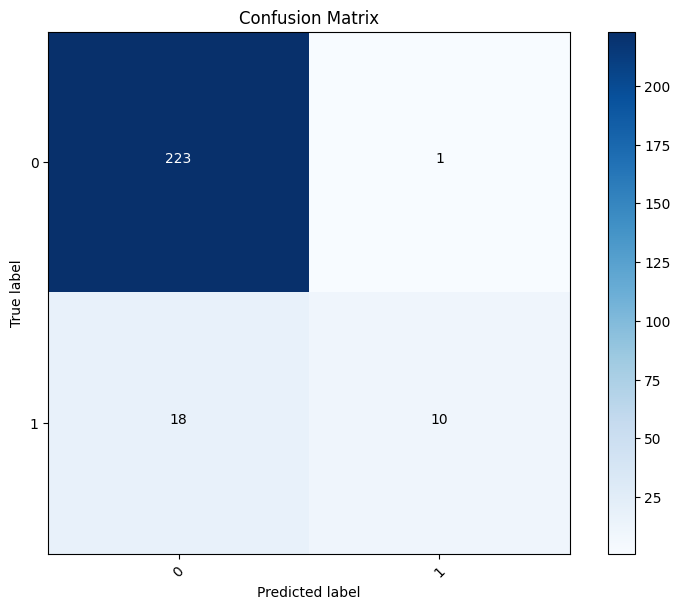

In [65]:
# Predecir utilizando el modelo entrenado
y_pred_dt = dt.predict(X_test)

# Calcular la matriz de confusión y la precisión
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Matriz de confusión del Árbol de Decisión:")
print(conf_matrix_dt)
print("Precisión del Árbol de Decisión:", accuracy_dt)

# print("Classification accuracy:", metrics.accuracy_score(y_test, y_pred_dt))
plot_confusion_matrix(y_test, y_pred_dt)
plt.show()

¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

### Conclusión: No, no hay mejora al usar max_depth 5 pero sí que hay mejora respecto al LogisticRegression que predecía todo Type "0". Como ejercicio extra pruebo RandomForestClassifier y vemos que funciona mucho mejor.

Matriz de confusión del Random Forest:
[[223   1]
 [ 18  10]]
Precisión del Random Forest: 0.9603174603174603


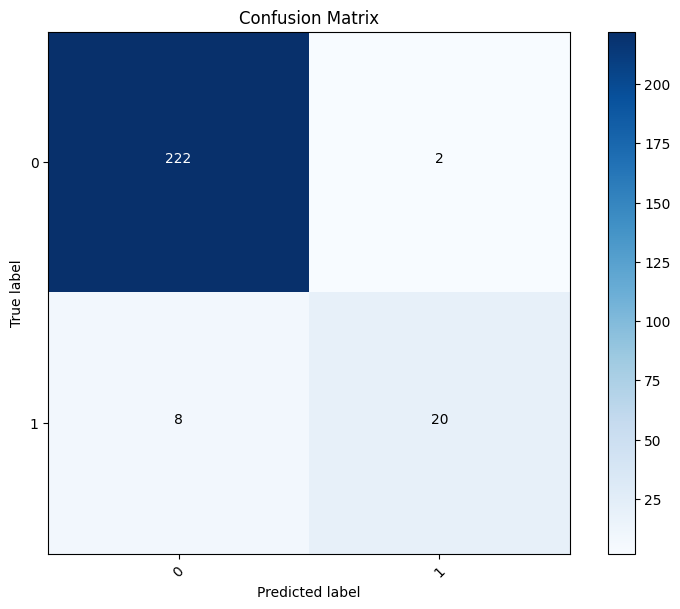

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
acc = metrics.accuracy_score(y_pred, y_test)
acc

# Calcular la matriz de confusión y la precisión
conf_matrix_rf = confusion_matrix(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)

print("Matriz de confusión del Random Forest:")
print(conf_matrix_dt)
print("Precisión del Random Forest:", accuracy_rf)

# print("Classification accuracy:", metrics.accuracy_score(y_test, y_pred_dt))
plot_confusion_matrix(y_test, y_pred)
plt.show()

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [66]:
# Your code here

## Conclusiones:

Add your comments here: